In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import normalize
from sklearn import metrics
import time

### Read IRIS data from website

In [5]:
url = "https://www.cs.nmsu.edu/~hcao/teaching/cs487519/data/iris.data"
data = pd.read_csv(url, header=None)
x_iris = data.iloc[:, 0:-1]
y_iris = data.iloc[:,-1]
y_iris.replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0, 1, 2], inplace=True)
x_iris = normalize(x_iris)

In [6]:
print(np.shape(data))
print(np.unique(y_iris))
print(np.shape(np.where(y_iris == 0)))
print(np.shape(np.where(y_iris == 1)))
print(np.shape(np.where(y_iris == 2)))

(150, 5)
[0 1 2]
(1, 50)
(1, 50)
(1, 50)


### Define the elbow method

In [7]:
def elbow(data, max_cluster_number):
    distortions = []
    for i in range(1, max_cluster_number):
        kmean_i = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
        kmean_i.fit(data)
        distortions.append(kmean_i.inertia_)
    plt.figure(figsize=(15, 6))
    plt.plot(range(1, max_cluster_number), distortions, marker='o')
    plt.xlabel('Value of k')
    plt.ylabel('Distortion')
    plt.title("The Elbow method for selection of optimal k")
    plt.show()

### Calculate the number of clusters for IRIS data from Elbow method

C:\Users\henga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


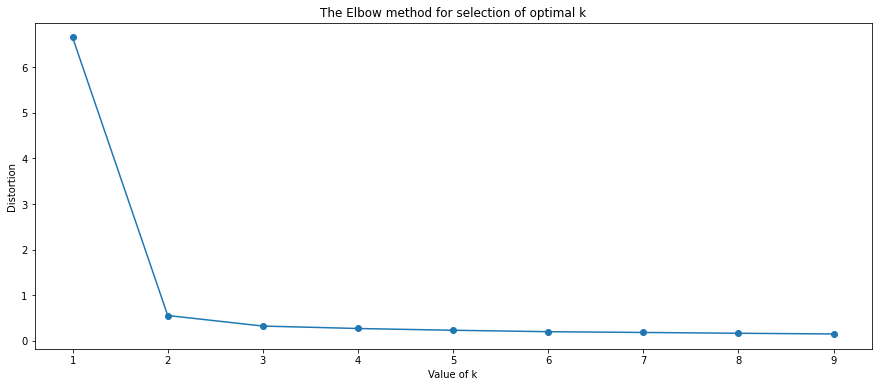

In [8]:
elbow(x_iris, 10)

### Read MNIST data

In [9]:
x, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

### Get a subset of MNIST data

In [10]:
X, x_mnist, Y, y_mnist = train_test_split(x, y, stratify=y, test_size=0.1)
x_mnist = normalize(x_mnist)

In [11]:
print(np.shape(x))
print(np.unique(y))
print(np.shape(x_mnist))
print(np.unique(y_mnist))
print(np.shape(np.where(y_mnist == '0')))
print(np.shape(np.where(y_mnist == '1')))
print(np.shape(np.where(y_mnist == '2')))
print(np.shape(np.where(y_mnist == '3')))
print(np.shape(np.where(y_mnist == '4')))
print(np.shape(np.where(y_mnist == '5')))
print(np.shape(np.where(y_mnist == '6')))
print(np.shape(np.where(y_mnist == '7')))
print(np.shape(np.where(y_mnist == '8')))
print(np.shape(np.where(y_mnist == '9')))

(70000, 784)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
(7000, 784)
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
(1, 690)
(1, 788)
(1, 699)
(1, 714)
(1, 682)
(1, 631)
(1, 688)
(1, 729)
(1, 683)
(1, 696)


### Calculate the number of clusters for MNIST data from Elbow method

In [ ]:
elbow(x_mnist, 20)

In [ ]:
sil = []
for n_cluster in range(2, 16):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', n_init=10, max_iter=100, random_state=0).fit(x_mnist)
    label = kmeans.labels_
    sil_coeff = silhouette_score(x_mnist, label, metric='euclidean')
    sil.append(sil_coeff)
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
plt.plot(range(2, 16), sil, marker='o')

### Applying different clustering methods on IRIS data

#### K-mean algorithm

In [ ]:
start_time = time.time()
kmean = KMeans(n_clusters=3, init='k-means++', n_init =10, max_iter=300, tol=1e-04, random_state=0) 
y_kmean = kmean.fit_predict(x_iris)
print("Running time:  %s seconds " % (time.time() - start_time))

In [ ]:
cluster_centers = [x_iris[kmean.labels_ == i].mean(axis=0) for i in range(3)]
clusterwise_sse = [0, 0, 0]

for point, label in zip(x_iris, kmean.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    
print(clusterwise_sse)

In [ ]:
sample_silhouette = silhouette_samples(x_iris, y_kmean)
silhouette = [0, 0, 0]
for i in range(3):
    silhouette_i = sample_silhouette[y_kmean == i]
    silhouette_i = silhouette_i.sum()/(np.shape(silhouette_i))
    silhouette[i] = silhouette_i
print(silhouette)

In [ ]:
silhouette_avg = silhouette_score(x_iris, y_kmean)
print(silhouette_avg)

In [ ]:
metrics.rand_score(y_iris, y_kmean)

#### Hierarchical approach offered by SciPy library

In [ ]:
start_time = time.time()
cluster1 = linkage(x_iris, method='ward', metric='euclidean')
clusters_iris = fcluster(cluster1, 3, criterion='maxclust')
print("Running time:  %s seconds " % (time.time() - start_time))

In [ ]:
cluster_centers = [x_iris[clusters_iris == i+1].mean(axis=0) for i in range(3)]
clusterwise_sse = [0, 0, 0]

for point, label in zip(x_iris, clusters_iris):
    clusterwise_sse[label-1] += np.square(point - cluster_centers[label-1]).sum()
    
print(clusterwise_sse)

In [ ]:
sample_silhouette = silhouette_samples(x_iris, clusters_iris)
silhouette = [0, 0, 0]
for i in range(3):
    silhouette_i = sample_silhouette[clusters_iris == i+1]
    silhouette_i = silhouette_i.sum()/(np.shape(silhouette_i))
    silhouette[i-1] = silhouette_i
print(silhouette)

In [ ]:
silhouette_avg = silhouette_score(x_iris, clusters_iris)
print(silhouette_avg)

In [ ]:
metrics.rand_score(y_iris, clusters_iris)

In [ ]:
plt.figure(figsize=(15, 6))
d1 = dendrogram(cluster1) 
plt.tight_layout()
plt.ylabel('Euclidean distance') 
plt.show()

#### Hierarchical approach offered by Scikit-learn library

In [ ]:
start_time = time.time()
hierarchical1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
y_hierarchical1 = hierarchical1.fit_predict(x_iris)
print("Running time:  %s seconds " % (time.time() - start_time))

In [ ]:
cluster_centers = [x_iris[y_hierarchical1 == i].mean(axis=0) for i in range(3)]
clusterwise_sse = [0, 0, 0]

for point, label in zip(x_iris, y_hierarchical1):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    
print(clusterwise_sse)

In [ ]:
sample_silhouette = silhouette_samples(x_iris, y_hierarchical1)
silhouette = [0, 0, 0]
for i in range(3):
    silhouette_i = sample_silhouette[y_hierarchical1 == i]
    silhouette_i = silhouette_i.sum()/(np.shape(silhouette_i))
    silhouette[i] = silhouette_i
print(silhouette)

In [ ]:
silhouette_avg = silhouette_score(x_iris, y_hierarchical1)
print(silhouette_avg)

In [ ]:
metrics.rand_score(y_iris, y_hierarchical1)

### Applying different clustering methods on MNIST data

#### K-mean algorithm

In [ ]:
start_time = time.time()
kmean2 = KMeans(n_clusters=10, init='k-means++', n_init =10, max_iter=300, tol=1e-04, random_state=0) 
y_kmean2 = kmean2.fit_predict(x_mnist)
print("Running time:  %s seconds " % (time.time() - start_time))

In [ ]:
cluster_centers = [x_mnist[kmean2.labels_ == i].mean(axis=0) for i in range(10)]
clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for point, label in zip(x_mnist, kmean2.labels_):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    
print(clusterwise_sse)
print(np.sum(clusterwise_sse))

In [ ]:
sample_silhouette = silhouette_samples(x_mnist, y_kmean2)
silhouette = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    silhouette_i = sample_silhouette[y_kmean2 == i]
    silhouette_i = silhouette_i.sum()/(np.shape(silhouette_i))
    silhouette[i] = silhouette_i
print(silhouette)

In [ ]:
silhouette_avg = silhouette_score(x_mnist, y_kmean2)
print(silhouette_avg)

In [ ]:
metrics.rand_score(y_mnist, y_kmean2)

#### Hierarchical approach offered by SciPy library

In [ ]:
start_time = time.time()
cluster2 = linkage(x_mnist, method='ward', metric='euclidean')
clusters_mnist = fcluster(cluster2, 10, criterion='maxclust')
print("Running time:  %s seconds " % (time.time() - start_time))

In [ ]:
cluster_centers = [x_mnist[clusters_mnist == i+1].mean(axis=0) for i in range(10)]
clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for point, label in zip(x_mnist, clusters_mnist):
    clusterwise_sse[label-1] += np.square(point - cluster_centers[label-1]).sum()
    
print(clusterwise_sse)
print(np.sum(clusterwise_sse))

In [ ]:
sample_silhouette = silhouette_samples(x_mnist, clusters_mnist)
silhouette = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    silhouette_i = sample_silhouette[clusters_mnist == i+1]
    silhouette_i = silhouette_i.sum()/(np.shape(silhouette_i))
    silhouette[i-1] = silhouette_i
print(silhouette)

In [ ]:
silhouette_avg = silhouette_score(x_mnist, clusters_mnist)
print(silhouette_avg)

In [ ]:
metrics.rand_score(y_mnist, clusters_mnist)

In [ ]:
plt.figure(figsize=(15, 6))
d2 = dendrogram(cluster2) 
plt.tight_layout()
plt.ylabel('Euclidean distance') 
plt.show()

#### Hierarchical approach offered by Scikit-learn library

In [ ]:
start_time = time.time()
hierarchical2 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
y_hierarchical2 = hierarchical2.fit_predict(x_mnist)
print("Running time:  %s seconds " % (time.time() - start_time))

In [ ]:
cluster_centers = [x_mnist[y_hierarchical2 == i].mean(axis=0) for i in range(10)]
clusterwise_sse = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for point, label in zip(x_mnist, y_hierarchical2):
    clusterwise_sse[label] += np.square(point - cluster_centers[label]).sum()
    
print(clusterwise_sse)
print(np.sum(clusterwise_sse))

In [ ]:
sample_silhouette = silhouette_samples(x_mnist, y_hierarchical2)
silhouette = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range(10):
    silhouette_i = sample_silhouette[y_hierarchical2 == i]
    silhouette_i = silhouette_i.sum()/(np.shape(silhouette_i))
    silhouette[i] = silhouette_i
print(silhouette)

In [ ]:
silhouette_avg = silhouette_score(x_mnist, y_hierarchical2)
print(silhouette_avg)

In [ ]:
metrics.rand_score(y_mnist, y_hierarchical2)